In [83]:
import numpy as np
import pandas as pd
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix 
import optuna
from optuna.trial import TrialState
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
import torchvision 
import optuna
from optuna.trial import TrialState
from torchvision import models
from torchhk import transform_model

In [84]:
model = nn.Sequential(nn.Conv2d(1, 3, kernel_size=5), models.resnet18(pretrained=True), nn.Linear(1000, 10))

In [85]:
model

Sequential(
  (0): Conv2d(1, 3, kernel_size=(5, 5), stride=(1, 1))
  (1): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d

In [86]:
transform_model(model, nn.Conv2d, bnn.BayesConv2d, 
                args={"prior_mu":0, "prior_sigma":0.1, "in_channels" : ".in_channels",
                      "out_channels" : ".out_channels", "kernel_size" : ".kernel_size",
                      "stride" : ".stride", "padding" : ".padding", "bias":".bias"
                     }, 
                attrs={"weight_mu" : ".weight"})

Sequential(
  (0): BayesConv2d(0, 0.1, 1, 3, kernel_size=(5, 5), stride=(1, 1))
  (1): ResNet(
    (conv1): BayesConv2d(0, 0.1, 3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): BayesConv2d(0, 0.1, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): BayesConv2d(0, 0.1, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): BayesConv2d(0, 0.1, 64, 64, kernel_size=(3, 3), stri

In [87]:
# Convert Linear -> BayesLinear
transform_model(model, nn.Linear, bnn.BayesLinear, 
            args={"prior_mu":0, "prior_sigma":0.1, "in_features" : ".in_features",
                  "out_features" : ".out_features", "bias":".bias"
                 }, 
            attrs={"weight_mu" : ".weight"})

Sequential(
  (0): BayesConv2d(0, 0.1, 1, 3, kernel_size=(5, 5), stride=(1, 1))
  (1): ResNet(
    (conv1): BayesConv2d(0, 0.1, 3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): BayesConv2d(0, 0.1, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): BayesConv2d(0, 0.1, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): BayesConv2d(0, 0.1, 64, 64, kernel_size=(3, 3), stri

In [88]:
# target_list = []
# data_list = []
# for data, target in test_loader:
#     data_list.append(data)
#     target_list.append(target)
# target_list

In [89]:
# for i in range(len(list_input_batch)):
#     if torch.cuda.is_available():
#         input_batch = list_input_batch[i].to('cuda')
#         resnet.to('cuda')
    
#     else:
#         input_batch = list_input_batch[i].to('cpu')
#         resnet.to('cpu')
    
#     with torch.no_grad():
#         output = resnet(input_batch)
#         print(output)

In [90]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [91]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/MNIST/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/MNIST/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [92]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

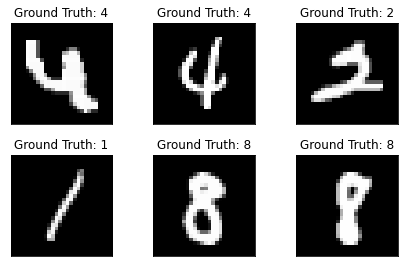

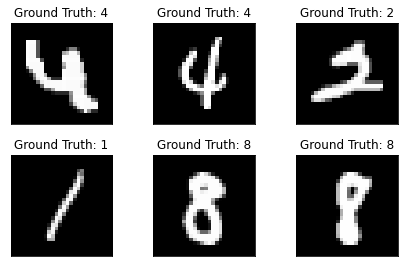

In [93]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [94]:
cross_entropy_loss = nn.CrossEntropyLoss() # the lost of the outcome?
klloss = bnn.BKLLoss(reduction='mean', last_layer_only=False) # To calculate the loss between the parameter distribution between pior and the posterior? 
klweight = 0.1
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [95]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [96]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss_1 = F.nll_loss(output, target)
        kl = klloss(model)
        total_cost = loss_1 + klweight*kl
        total_cost.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), total_cost.item()))
            train_losses.append(total_cost.item())
            train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
        test()

In [97]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            kl = klloss(model)
            test_loss += (F.nll_loss(output, target, size_average=False).item() + klweight*kl)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
#     print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
#     test_loss, correct, len(test_loader.dataset),
#     100 * correct / len(test_loader.dataset)))
    print("AVG loss", test_loss)
    print("Correct", correct)
    print("Accuracy", correct/len(test_loader.dataset))

In [98]:
n_epochs = 2
test()
for epoch in range(1, n_epochs + 1):
    train(epoch)


AVG loss tensor([-28433.6133])
Correct tensor(1071)
Accuracy tensor(0.1071)
Train Epoch: 1 [0/60000 (0%)]	Loss: -1.773276
AVG loss tensor([-13101.9863])
Correct tensor(1045)
Accuracy tensor(0.1045)
AVG loss tensor([-2511.9023])
Correct tensor(1055)
Accuracy tensor(0.1055)


KeyboardInterrupt: 